## Backup scripts (might be useful)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import pandas as pd
import cv2 as cv
from PIL import Image
import pickle
import random

## Load FMC data from .mat file

In [2]:
mat = scipy.io.loadmat('timeTraces.mat')
fmc = mat['timeTraces']
print(list(fmc.shape))
print(type(fmc))

[4472, 16, 16]
<class 'numpy.ndarray'>


## Read Images

By reading the images in greyscale, it compresses the images to 2 dimensions, instead of 3 dimensions.

The shape of the images will be (X, Y) instead of (X, Y, Z).

Colormap of the image:

https://matplotlib.org/stable/tutorials/colors/colormaps.html

The shape of the GREYSCALE image is (180, 240)


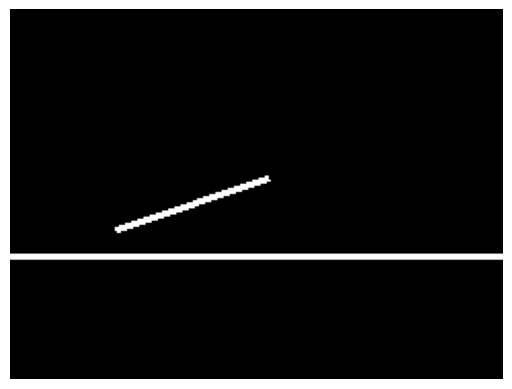

The shape of the image is (180, 240, 3)


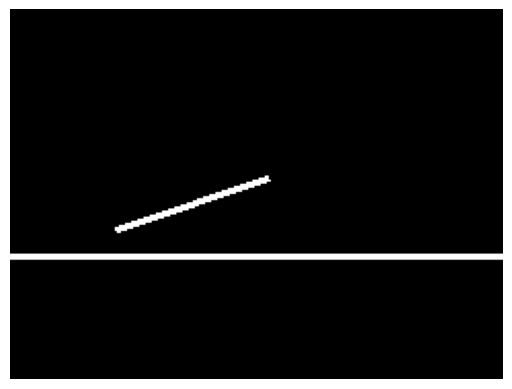

In [4]:
# Read Images in greyscale
import cv2 as cv

# directory name
dirName = "/Users/chenkangan/PycharmProjects/ME4_FYP_py/py_output_fig"
imageName = 'defect_1_yshift_60.png'


def read_image(dirName, imageName, grey = True):
    
    if grey == True:
        image = cv.imread(f'{dirName}/{imageName}', cv.IMREAD_GRAYSCALE)
        print(f'The shape of the GREYSCALE image is {image.shape}')
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.show()
              
    else:
        image = cv.imread(f'{dirName}/{imageName}')
        print(f'The shape of the image is {image.shape}')
        plt.imshow(image, cmap='gray')
        plt.axis('off')
        plt.show()
          
    return None

read_image(dirName, imageName, grey = True)
read_image(dirName, imageName, grey = False)

## Read FMC data as an image

### Modes of reading an image

PIL.Image.fromarray(obj, mode=None)

https://pillow.readthedocs.io/en/stable/reference/Image.html

https://pillow.readthedocs.io/en/stable/handbook/concepts.html#concept-modes

- 1 (1-bit pixels, black and white, stored with one pixel per byte)
- L (8-bit pixels, black and white)
- P (8-bit pixels, mapped to any other mode using a color palette)
- RGB (3x8-bit pixels, true color)
- RGBA (4x8-bit pixels, true color with transparency mask)
- CMYK (4x8-bit pixels, color separation)
- YCbCr (3x8-bit pixels, color video format)
- Note that this refers to the JPEG, and not the ITU-R BT.2020, standard
- LAB (3x8-bit pixels, the L*a*b color space)
- HSV (3x8-bit pixels, Hue, Saturation, Value color space)
- Hue’s range of 0-255 is a scaled version of 0 degrees <= Hue < 360 degrees
- I (32-bit signed integer pixels)
- F (32-bit floating point pixels)

In [5]:
# Method 1 to show an image
from PIL import Image
# L iss black and white
img = Image.fromarray(fmc[:,:,1],'L')
print(f'The shape of the FMC slice is {fmc[:,:,1].shape}')
img.save('fmc_image_PIL.png')
# img.show()

# greyscale = true 
# This is preferred because we do not want color channel information affect the CNN
read_image(dirName = "/Users/chenkangan/PycharmProjects/ME4_FYP_py", 
           imageName = "fmc_image_PIL.png" , 
           grey = True)

# greyscale = false
# read_image(dirName = "/Users/chenkangan/PycharmProjects/ME4_FYP_py", 
#            imageName = "fmc_image_PIL.png" , 
#            grey = False)

The shape of the FMC slice is (4472, 16)
The shape of the GREYSCALE image is (4472, 16)


[895, 16, 16]
<class 'numpy.ndarray'>


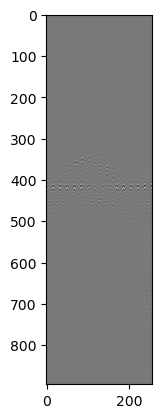

In [11]:
mat = scipy.io.loadmat('timeTraces.mat')
fmc = mat['timeTraces']
fmc = fmc[0::5]
print(list(fmc.shape))
print(type(fmc))

# Save FMC as an image
fmc = fmc.reshape(-1, 16 * 16)

img = Image.fromarray(fmc,'L')
img.save('fmc_image_PIL.png')

plt.imshow(fmc, cmap='gray')

The shape of the FMC slice is (4472, 16)
The shape of the GREYSCALE image is (480, 640)


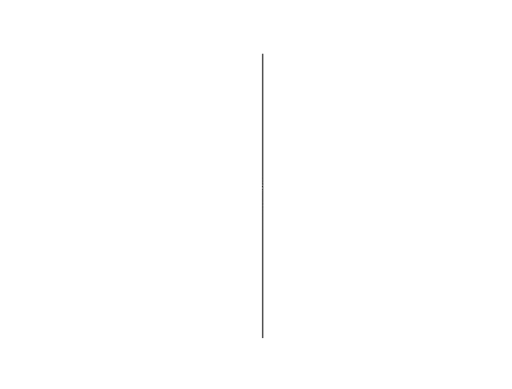

In [12]:
# Method 2 to show an image (This method is not good as the shape will change)
plt.imshow(fmc[:,:,1], interpolation='nearest')
print(f'The shape of the FMC slice is {fmc[:,:,1].shape}')
plt.axis('off')
plt.savefig('fmc_image_plt.png')

# greyscale = true 
# This is preferred because we do not want color channel information affect the CNN
read_image(dirName = "/Users/chenkangan/PycharmProjects/ME4_FYP_py", 
           imageName = "fmc_image_plt.png" , 
           grey = True)

## Others

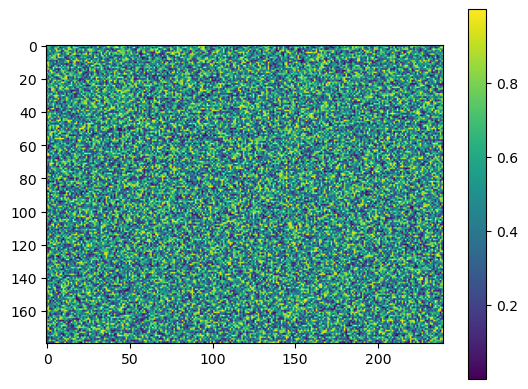

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Generate a random matrix 120 * 120
matrix = np.random.rand(180,240)

# Show matrix
plt.imshow(matrix)
plt.colorbar()
plt.show()

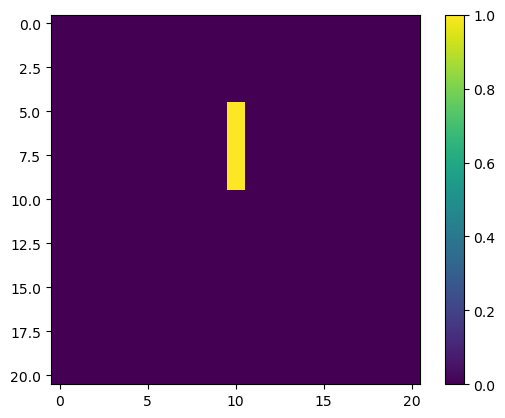

In [2]:
x = np.linspace(-10,10,21)
y = np.linspace(-10,10,21)

matrix = np.zeros((21,21))

for i in range(5,10):
    matrix[i][10] = 1

plt.imshow(matrix)
plt.colorbar()
plt.show()

# OpenCV
Online reference: https://docs.opencv.org/4.x/dc/da5/tutorial_py_drawing_functions.html

In [3]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import axis

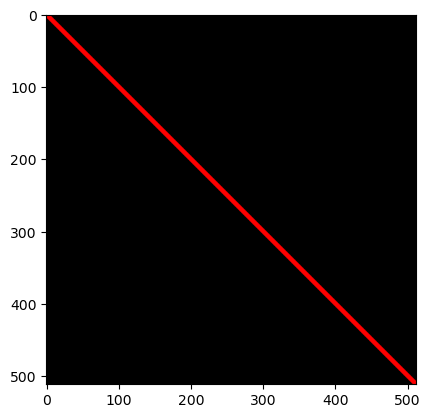

In [4]:
# Create a black image
img = np.zeros((512,512,3), np.uint8)

# Draw a diagonal blue line with thickness of 5 px
img = cv.line(img,(0,0),(511,511),(255,0,0),5)

plt.imshow(img)

## Define a function to plot the rectangular defect
To draw a polygon, first you need coordinates of vertices.\
Make those points into an array of shape ROWSx1x2 where ROWS are number of vertices and it should be of type int32.\
Here we draw a small polygon of with four vertices in yellow color.

(180, 240, 3)

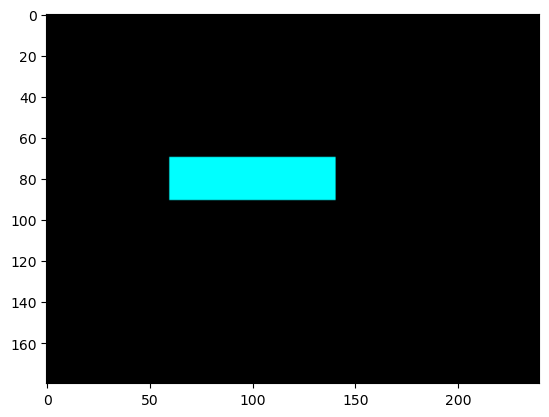

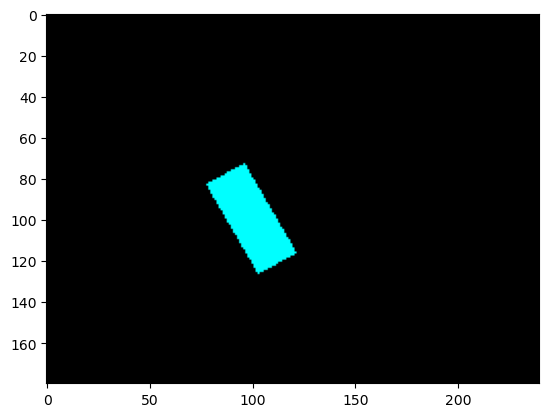

In [5]:
def plot_defect(xc, yc, width, height, theta):
    
    """
    xc = x_central; 
    yc = y_central;
    width = width of defect;
    height = height of defect; 
    theta = rotation of defect (anticlockwise)
    """
    
    # define an image
    # img = np.zeros((512,512,3), np.uint8)
    img = np.zeros((180,240,3), np.uint8)
    
    # convert angle from degree to radians, add a negative sign to convert from clockwise to anticlockwise
    theta = np.radians(-theta)
    
    # compute sine and cosine
    cos_theta, sin_theta = np.cos(theta), np.sin(theta)
    
    # let w and h be half of the width and height
    w, h = width/2, height/2
    
    # Coordinate: check the notes for details
    # left up corner
    x1, y1 = (xc - w*cos_theta - h*sin_theta), (yc - w*sin_theta + h*cos_theta)
    # right up corner
    x2, y2 = (xc + w*cos_theta - h*sin_theta), (yc + w*sin_theta + h*cos_theta)
    # right down corner
    x3, y3 = (xc + w*cos_theta + h*sin_theta), (yc + w*sin_theta - h*cos_theta)
    # left down corner
    x4, y4 = (xc - w*cos_theta + h*sin_theta), (yc - w*sin_theta - h*cos_theta)
    
    pts = np.array([[x1, y1],[x2, y2],[x3, y3],[x4, y4]], np.int32)
    
    # reformat the points
    pts = pts.reshape((-1,1,2))
    
    img = cv.fillPoly(img,[pts],(0,255,255)) # color in yellow (0, 255, 255)
    
   #Vertically flip the image because the y axis is labelled upside down
    flipVertical = cv.flip(img, 0)

    fig, ax = plt.subplots()
    ax.imshow(img)
#     ax.set_yticks(np.arange(0,512,100))
#     ax.set_yticklabels(np.arange(512,0,-100))
        
    return img.shape

# same rectangle but different angle of rotation
plot_defect(xc = 100, yc = 80, width = 80, height = 20, theta = 0)
plot_defect(xc = 100, yc = 100, width = 20, height = 50, theta = 30)
    

In [8]:
# To draw a polygon, first you need coordinates of vertices. 
# Make those points into an array of shape ROWSx1x2 where ROWS are number of vertices and it should be of type int32. 
# Here we draw a small polygon of with four vertices in yellow color.


pts = np.array([[10,5],[20,30],[70,20],[50,10]], np.int32)
pts = pts.reshape((-1,1,2))
#cv.polylines(img,[pts],True,(0,255,255))


In [9]:
x = np.arange(-0.06, 0.06, 0.5e-3) # length = 240
y = np.arange(0, 0.09, 0.5e-3) # length = 180

def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

index = find_nearest(x, 0)
print(index)

120
